# Predicting Road Accident Risk

<img src="https://media.licdn.com/dms/image/v2/D4E12AQFrJ-b-3S2TSA/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1699522843393?e=2147483647&v=beta&t=n8-ezTnf6XcS3TRZ6enIkTOSYXYpfudMBjZIY29S30w" width="600">

The goal of this project is to predict the likelihood of accidents on different types of roads. The dataset is from a **Kaggle Playground Series** competition , and this is a **regression** problem. The target variable is `accident_risk`.

The dataset for this competition (both train and test) was generated from a deep learning model trained on the original **Simulated Roads Accident** dataset. Feature distributions are close to, but not exactly the same as, the original.

 ---

## Features Description

* `id`: Unique identifier for each observation (numeric).
* `road_type`: The type of road (categorical: 'urban', 'rural', 'highway').
* `num_lanes`: Number of lanes on the road (numeric).
* `curvature`: The degree of road curvature (numeric).
* `speed_limit`: The allowed speed limit (numeric).
* `lighting`: Lighting conditions (categorical: 'daylight', 'dim', 'dark').
* `weather`: Weather conditions (categorical: 'rainy', 'clear', 'foggy').
* `road_signs_present`: Whether road signs are present (boolean: 'True', 'False').
* `public_road`: Whether the road is public (boolean: 'True', 'False').
* `time_of_day`: The time of day (categorical: 'afternoon', 'evening', 'morning').
* `holiday`: Whether the day is a holiday (boolean: 'True', 'False').
* `school_season`: Whether it is the school season (boolean: 'True', 'False').
* `num_reported_accidents`: The number of previously reported accidents (numeric).
* `accident_risk`: The probability of an accident, a continuous value between [0-1] (numeric, **target variable**).

---
The dataset was taken from Kaggle.

[Kaggle | Predicting Road Accident Risk](https://www.kaggle.com/competitions/playground-series-s5e10/overview)

## Data Read 

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e10/sample_submission.csv
/kaggle/input/playground-series-s5e10/train.csv
/kaggle/input/playground-series-s5e10/test.csv


In [38]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [68]:
train = pd.train = pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv')
test = pd.train = pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv')
sample = pd.train = pd.read_csv('/kaggle/input/playground-series-s5e10/sample_submission.csv')

## EDA - Exploratory Data Analysis 

In [40]:
train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [41]:
train.tail()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51
517753,517753,highway,2,0.31,45,dim,rainy,False,True,afternoon,True,True,2,0.22


In [42]:
train.shape

(517754, 14)

In [43]:
train.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [45]:
train.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

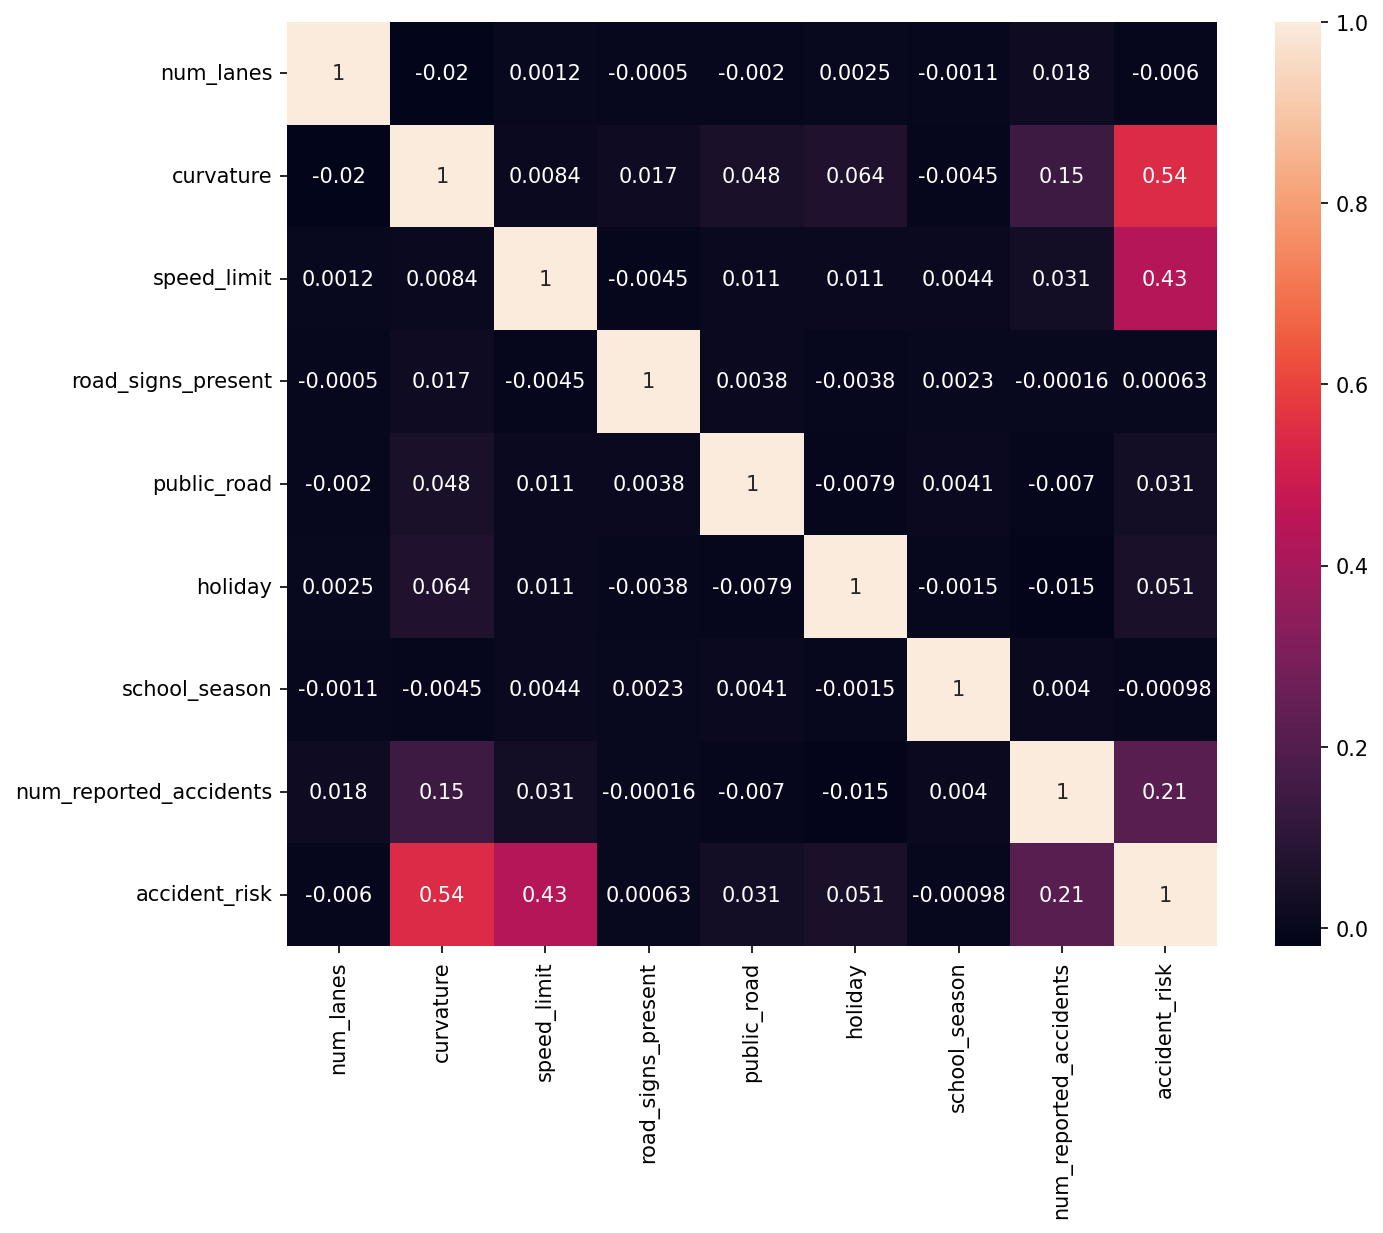

In [47]:
plt.figure(figsize=(10,8), dpi=150)
sns.heatmap(train.drop(columns=['id']).corr(numeric_only=True), annot=True)

<Axes: xlabel='accident_risk', ylabel='Count'>

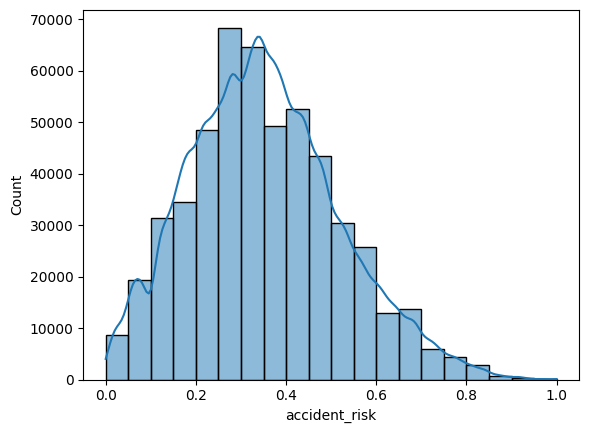

In [48]:
sns.histplot(train['accident_risk'], bins=20, kde=True)

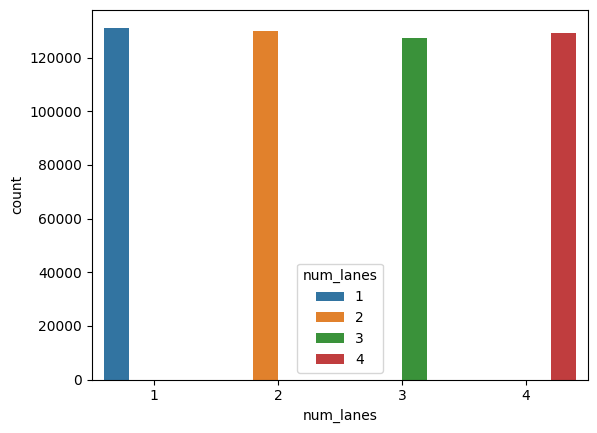

In [49]:
sns.countplot(x=train['num_lanes'],hue=train['num_lanes']);

<Axes: xlabel='road_type', ylabel='accident_risk'>

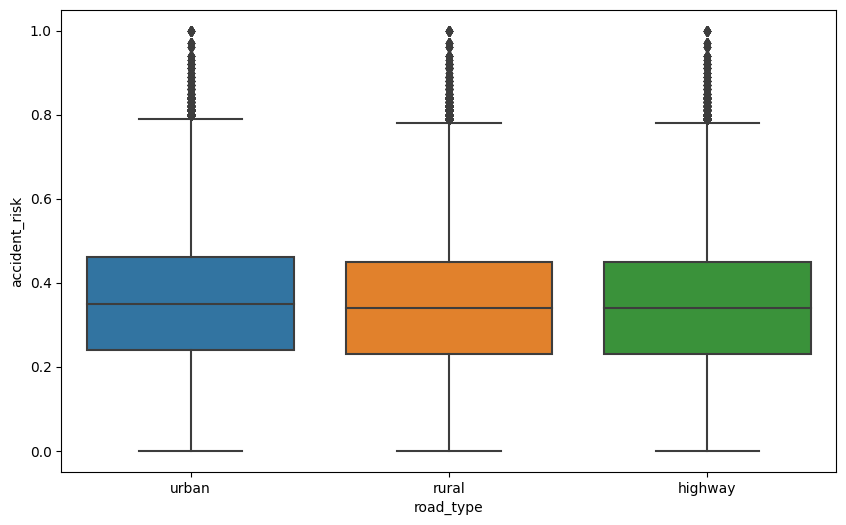

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='road_type', y='accident_risk', data=train)

<Axes: xlabel='weather', ylabel='accident_risk'>

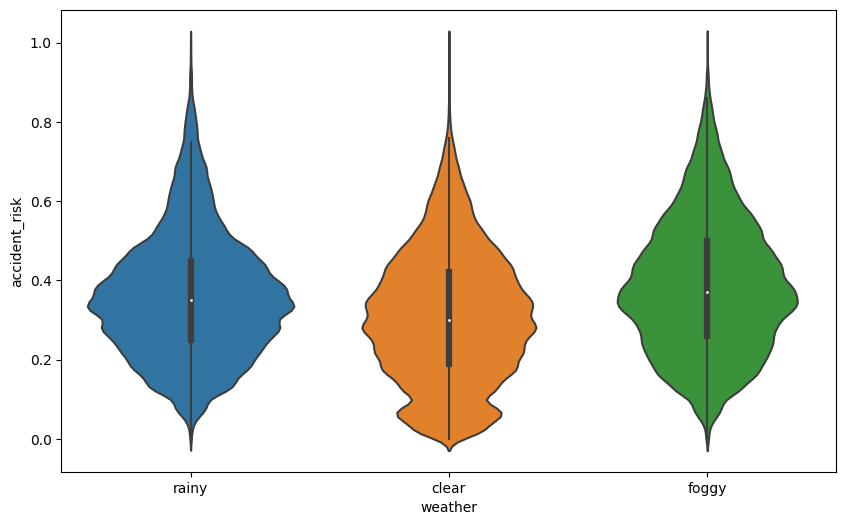

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='weather', y='accident_risk', data=train)

<Axes: xlabel='curvature', ylabel='accident_risk'>

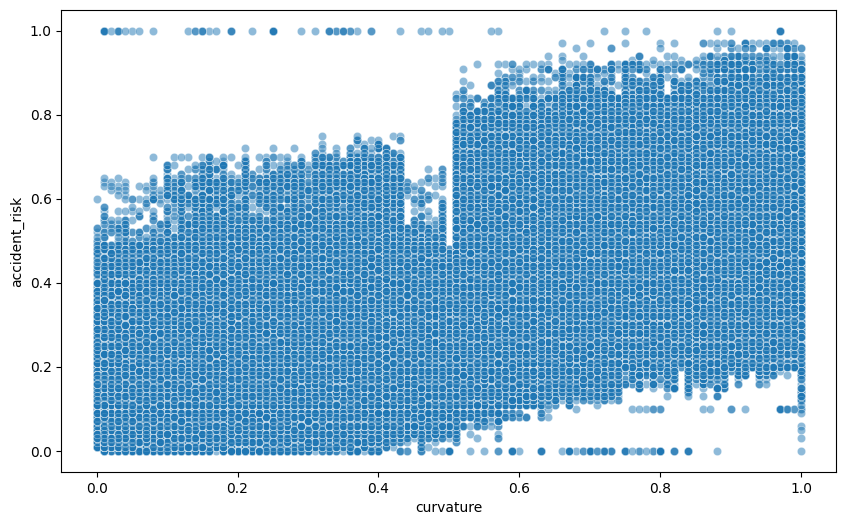

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='curvature', y='accident_risk', data=train, alpha=0.5)

In [53]:
abs(train.corr(numeric_only=True)['accident_risk'].sort_values(ascending=False)) 

accident_risk             1.000000
curvature                 0.543946
speed_limit               0.430898
num_reported_accidents    0.213891
holiday                   0.051129
public_road               0.031032
id                        0.000969
road_signs_present        0.000629
school_season             0.000977
num_lanes                 0.006003
Name: accident_risk, dtype: float64

## Modelling 

In [54]:
x = train.drop(columns=['id','accident_risk','num_lanes','school_season','road_signs_present'])
y = train['accident_risk']

In [55]:
x = pd.get_dummies(x,drop_first=True)

In [56]:
x.head()

,curvature,speed_limit,public_road,holiday,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,0.06,35,True,False,1,False,True,False,False,False,True,False,False
1,0.99,35,False,True,0,False,True,False,False,False,False,True,False
2,0.63,70,True,True,2,True,False,True,False,False,False,False,True
3,0.07,35,True,False,1,False,False,True,False,False,True,False,True
4,0.58,60,False,True,1,True,False,False,False,True,False,True,False


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def algo_test(x,y):

        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'AdaBoost','Decision Tree','XGBRegressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            print(algo, " modeli eğitiliyor!..")
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable = result.sort_values('RMSE', ascending=True)
        return rtable

In [58]:
algo_test(x, y)

LinearRegression()  modeli eğitiliyor!..
Ridge()  modeli eğitiliyor!..
Lasso()  modeli eğitiliyor!..
ElasticNet()  modeli eğitiliyor!..
SGDRegressor()  modeli eğitiliyor!..
ExtraTreeRegressor()  modeli eğitiliyor!..
GradientBoostingRegressor()  modeli eğitiliyor!..
AdaBoostRegressor()  modeli eğitiliyor!..
DecisionTreeRegressor()  modeli eğitiliyor!..
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strateg

,R_Squared,RMSE,MAE
XGBRegressor,0.884926,0.056369,0.043761
Gradient Boosting,0.881919,0.057101,0.044450
Ridge,0.804179,0.073533,0.058310
Linear,0.804179,0.073533,0.058310
SGD,0.804029,0.073561,0.058320
Extra Tree,0.789679,0.076206,0.058590
Decision Tree,0.789462,0.076246,0.058671
AdaBoost,0.711339,0.089278,0.070665
Lasso,-0.000047,0.166173,0.132693
ElasticNet,-0.000047,0.166173,0.132693


In [60]:
from xgboost import XGBRegressor

In [61]:
x=MinMaxScaler().fit_transform(x)

In [62]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [63]:
xgb=XGBRegressor()

In [65]:
model = xgb.fit(x_train,y_train)

In [69]:
test = test.drop(columns=['id','num_lanes','school_season','road_signs_present'])

In [70]:
test = pd.get_dummies(test,drop_first=True)

In [71]:
tahmin = xgb.predict(test)

In [72]:
tahmin

array([0.37251028, 0.29928547, 0.2579142 , ..., 0.16649176, 0.3020835 ,
       0.6814425 ], dtype=float32)

## Submission

In [74]:
submission_id = sample['id']

In [75]:
submission = pd.DataFrame({'id': submission_id, 'accident_risk' : tahmin})

In [76]:
submission.to_csv('submission.csv', index=False)
print('Submission Saved!')

Submission Saved!


## Conclusion

In this project, various regression models were compared to predict road accident risk. Based on the evaluation, **XGBRegressor** was identified as the most successful model, achieving the lowest error rate with an **RMSE of 0.0563**.

Using this model, predictions were made on the competition's test data and submitted to Kaggle, resulting in a public leaderboard score of **0.16605 RMSE**. The difference between the local validation score and the public score may be due to variations in the data distributions or some degree of model overfitting.




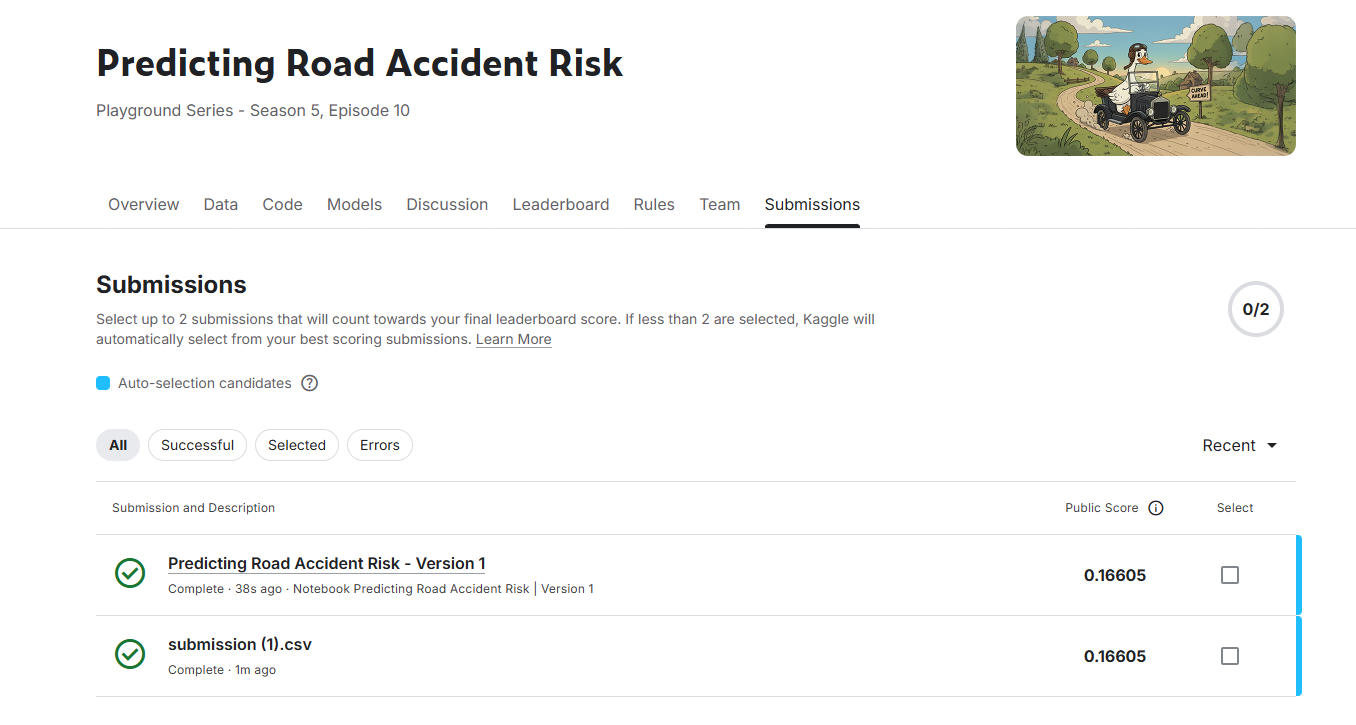

In [78]:
from IPython.display import Image, display

display(Image(filename="/kaggle/input/scoree/score.png"))
